![](https://storage.googleapis.com/kaggle-competitions/kaggle/24191/logos/header.png?t=2020-11-24-14-43-27)

# Welcome
The [Acea Group](https://www.gruppo.acea.it/en) is one of the leading Italian multiutility operators. Listed on the Italian Stock Exchange since 1999, the company manages and develops water and electricity networks and environmental services. Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in Lazio, Tuscany, Umbria, Molise, Campania.

In this competition we will focus only on the water sector to help Acea Group preserve precious waterbodies. As it is easy to imagine, a water supply company struggles with the need to forecast the water level in a waterbody (water spring, lake, river, or aquifer) to handle daily consumption. During fall and winter waterbodies are refilled, but during spring and summer they start to drain. To help preserve the health of these waterbodies it is important to predict the most efficient water availability, in terms of level and water flow for each day of the year.

# Data
The reality is that each waterbody has such unique characteristics that their attributes are not linked to each other. This analytics competition uses datasets that are completely independent from each other. However, it is critical to understand total availability in order to preserve water across the country.

Each dataset represents a different kind of waterbody. As each waterbody is different from the other, the related features are also different. So, if for instance we consider a water spring we notice that its features are different from those of a lake. These variances are expected based upon the unique behavior and characteristics of each waterbody. The Acea Group deals with four different type of waterbodies: water springs, lakes, rivers and aquifers.

# Challenge
Can you build a story to predict the amount of water in each unique waterbody? The challenge is to determine how features influence the water availability of each presented waterbody. To be more straightforward, gaining a better understanding of volumes, they will be able to ensure water availability for each time interval of the year.

The time interval is defined as day/month depending on the available measures for each waterbody. Models should capture volumes for each waterbody(for instance, for a model working on a monthly interval a forecast over the month is expected).

The desired outcome is a notebook that can generate four mathematical models, one for each category of waterbody (acquifers, water springs, river, lake) that might be applicable to each single waterbody.

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F6195295%2Fcca952eecc1e49c54317daf97ca2cca7%2FAcea-Input.png?generation=1606932492951317&alt=media)

# Evaluation 
This is an Analytics competition where your task is to create a Notebook that best addresses the Evaluation criteria below. Submissions should be shared directly with host and will be judged by the Acea Group based on how well they address:

**Methodology/Completeness (min 0 points, max 5 points)**

- Are the statistical models appropriate given the data?
- Did the author develop one or more machine learning models?
- Did the author provide a way of assessing the performance and accuracy of their solution?
- What is the Mean Absolute Error (MAE) of the models?
- What is the Root Mean Square Error (RMSE) of the models?

**Presentation (min 0 points, max 5 points)**

- Does the notebook have a compelling and coherent narrative?
- Does the notebook contain data visualizations that help to communicate the author’s main points?
- Did the author include a thorough discussion on the intersection between features and their prediction? For example between rainfall and amount/level of water.
- Was there discussion of automated insight generation, demonstrating what factors to take into account?
- Is the code documented in a way that makes it easy to understand and reproduce?
- Were all external sources of data made public and cited appropriately?

**Application (min 0 points, max 5 points)**

- Is the provided model useful/able to forecast water availability in terms of level or water flow in a time interval of the year?
- Is the provided methodology applicable also on new datasets belong to another waterbody?


## Deadline
- Entry and Final submission deadline: **February 17, 2021**
- Winners announced: **March 10, 2021**

# Data Description

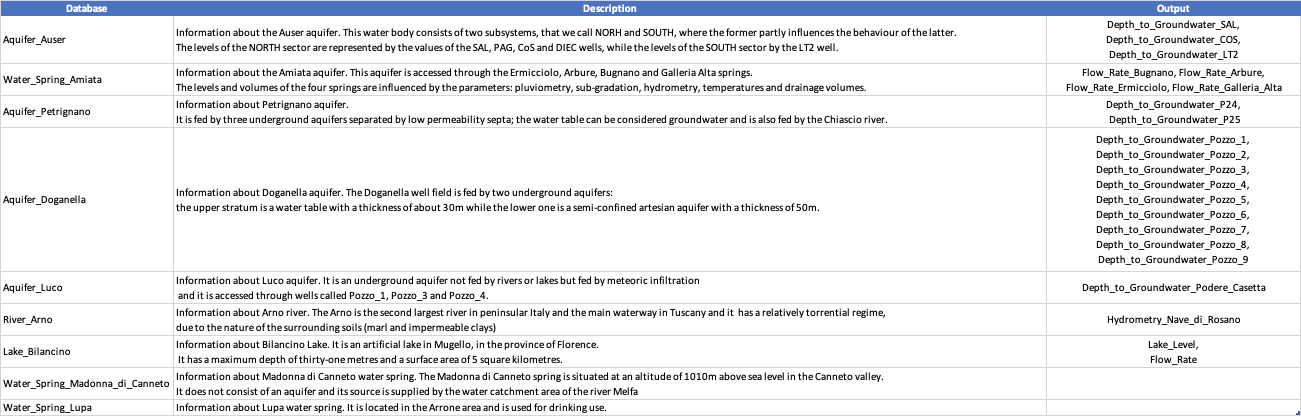

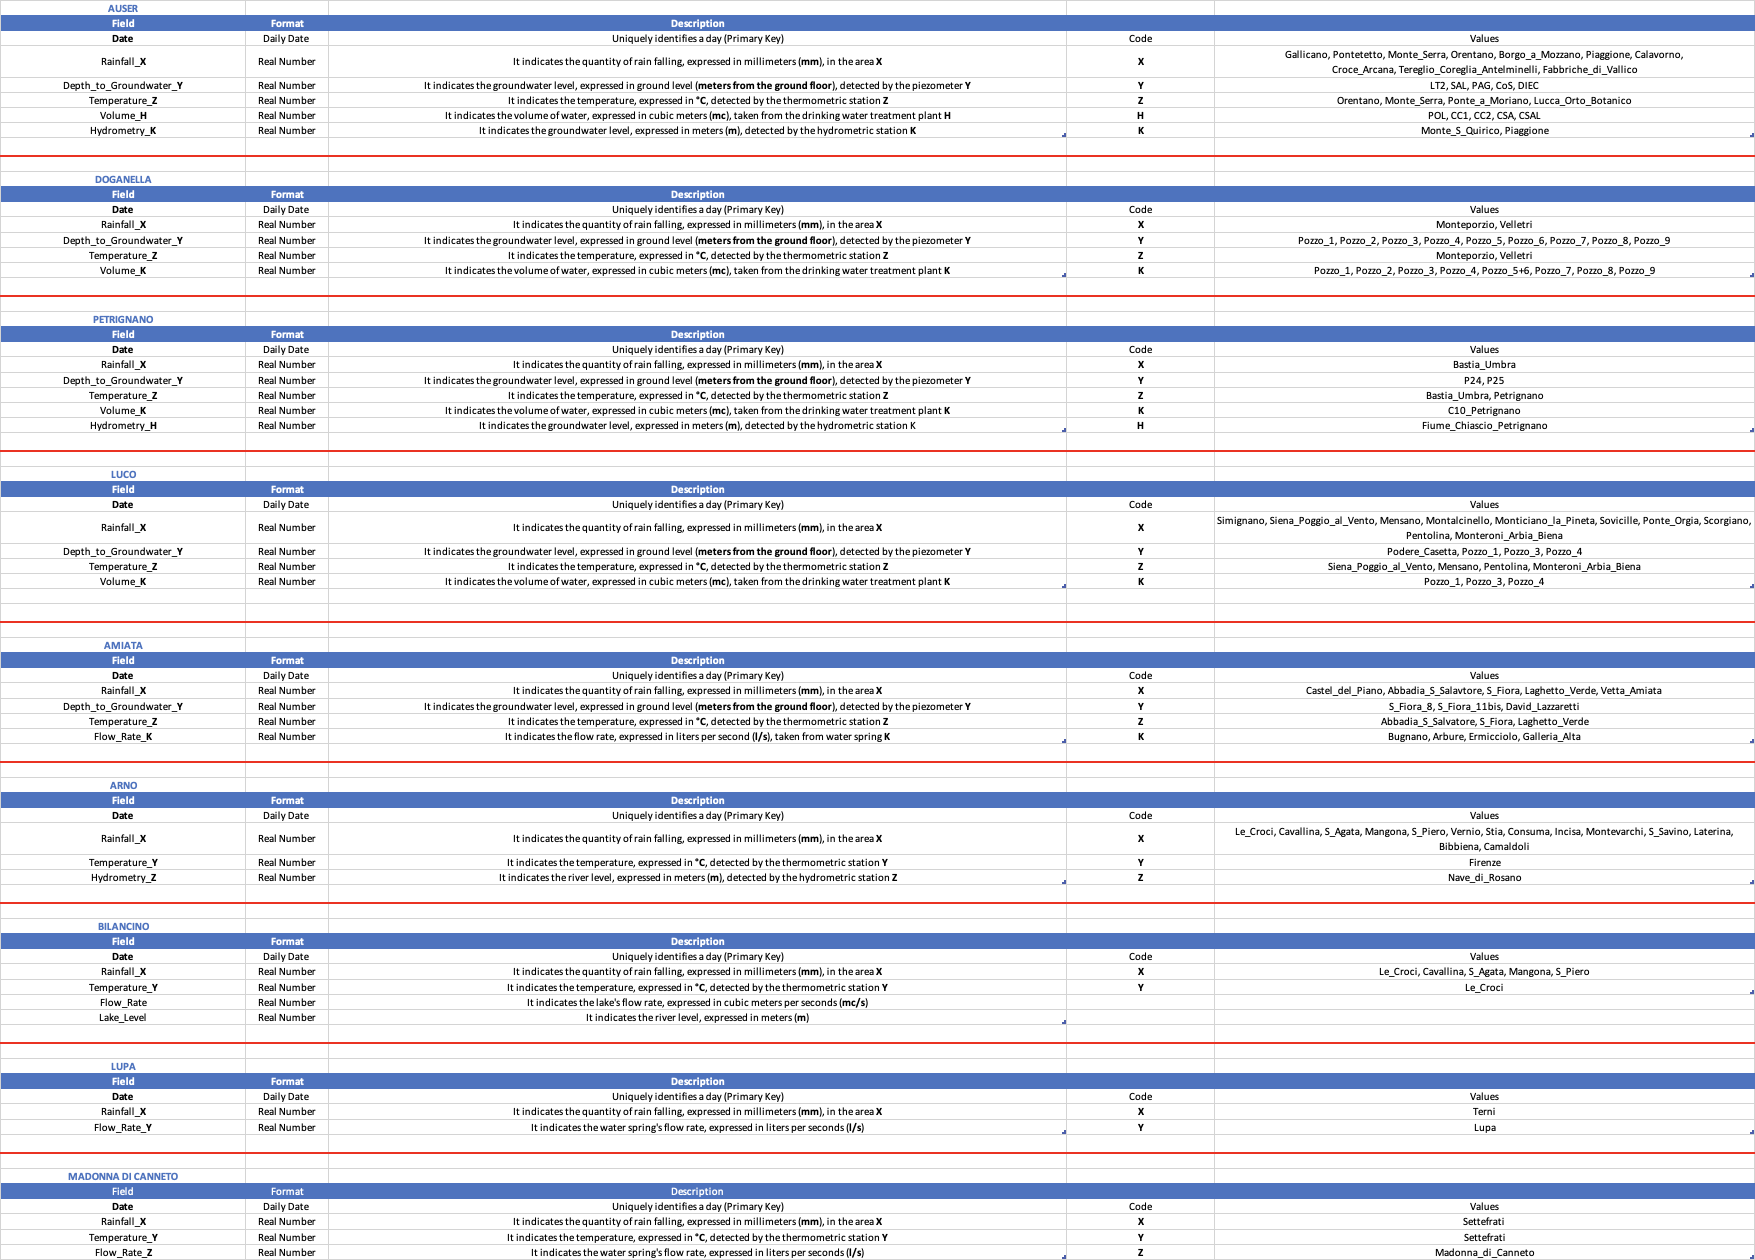

# 1. Packages

In [ ]:
# Base 
# -----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Missing Value
# -----------------------------------
# !pip install missingno
import missingno as msno

# Configuration
# -----------------------------------
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

from termcolor import colored

# 2. Data

In [ ]:
# Import
aq_auser = pd.read_csv("../input/acea-water-prediction/Aquifer_Auser.csv")
aq_doganella = pd.read_csv("../input/acea-water-prediction/Aquifer_Doganella.csv")
aq_luco = pd.read_csv("../input/acea-water-prediction/Aquifer_Luco.csv")
aq_petrignago = pd.read_csv("../input/acea-water-prediction/Aquifer_Petrignano.csv")
lakeBilancino = pd.read_csv("../input/acea-water-prediction/Lake_Bilancino.csv")
riverArno = pd.read_csv("../input/acea-water-prediction/River_Arno.csv")
ws_Amiata = pd.read_csv("../input/acea-water-prediction/Water_Spring_Amiata.csv")
ws_Lupa = pd.read_csv("../input/acea-water-prediction/Water_Spring_Lupa.csv")
ws_Madonna = pd.read_csv("../input/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv")


# 3. Data Info

In [ ]:
datasets = {"Aquifer Auser":aq_auser, "Aquifer Doganella":aq_doganella, "Aquifer Luco":aq_luco, "Aquifer Petrignano":aq_petrignago,
            "Lake Bilancino":lakeBilancino, "River Arno":riverArno, "Water Spring Amiata":ws_Amiata, "Water Spring Lupa":ws_Lupa, 
            "Water Spring Madonna di Canneto":ws_Madonna}

for i in datasets.keys():
    print(colored(i.upper()+": \n", "cyan", attrs=["bold",'reverse', 'blink']), 
          # Dimensions
          "Observations:" + str(datasets[i].shape[0]), "| Variables:"+str(datasets[i].shape[1]), "\n\n",
         
          # Missing Value
          "Does the data include any missing value? \n", aq_auser.isnull().values.any(), "\n"
         )
    
    for j in ["object", "bool", "integer", "float"]:
          if datasets[i].select_dtypes(j).shape[1]>0:
                print(" Num of "+j.capitalize()+" Variables:",datasets[i].select_dtypes(j).shape[1])
    print("\n\n")

# 4. Missing Value


In [ ]:
for i in datasets.keys():
    msno.heatmap(datasets[i])
    plt.show()

In [ ]:
def missing_values(data, plot = False, target = "SalePrice"):
    
    mst = pd.DataFrame({"Num_Missing":data.isnull().sum(), "Missing_Ratio":data.isnull().sum() / data.shape[0]}).sort_values("Num_Missing", ascending = False)
    #mst["DataTypes"] = data[mst.index].dtypes.values
    mst = mst[mst.Num_Missing > 0].reset_index().rename({"index":"Feature"}, axis = 1)
    mst = mst[mst.Feature != target]
    
    print("Number of Variables include Missing Values:", mst.shape[0], "\n")
    
    if mst[mst.Missing_Ratio >= 1.0].shape[0] > 0:  
        print("Full Missing Variables:",mst[mst.Missing_Ratio >= 1.0].Feature.tolist())
        data.drop(mst[mst.Missing_Ratio >= 1.0].Feature.tolist(), axis = 1, inplace = True)

        print("Full missing variables are deleted!", "\n")

    if plot:
        plt.figure(figsize = (25, 8))    
        p = sns.barplot(mst.Feature, mst.Missing_Ratio)
        for rotate in p.get_xticklabels():
            rotate.set_rotation(90)
            
            
    print(mst, "\n")        
    

for i in datasets.keys():
    print(colored(i.upper()+":", "cyan", attrs=["bold",'reverse', 'blink']))
    missing_values(datasets[i], plot = True, target = "")
    print("\n\n")

# 5. Numeric Variables 

In [ ]:
def num_plot(data, cat_length = 10, remove = ["Id"], hist_bins = 10, figsize = (20,4)):
    
    num_cols = [col for col in data.columns if data[col].dtypes != "O" 
                and len(data[col].unique()) >= cat_length]
    
    if len(remove) > 0:
        num_cols = [x for x in num_cols if (x not in remove)]
           
    for i in num_cols:
        fig, axes = plt.subplots(1, 3, figsize = figsize)
        data.hist(str(i), bins = hist_bins, ax=axes[0])
        data.boxplot(str(i),  ax=axes[1], vert=False);
        try: 
            sns.kdeplot(np.array(data[str(i)]))
        except: ValueError
        
        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        plt.show()
        

for i in datasets.keys():
    print(i.upper())
    num_plot(datasets[i], cat_length = 10, remove = ["Id"], hist_bins = 10, figsize = (20,4))
    print("\n\n")



# 6. Correlation

In [ ]:
for i in datasets.keys():
    print(colored(i.upper()+":", "cyan", attrs=["bold",'reverse', 'blink']))
    sns.set(font_scale=1.1)
    c = datasets[i].corr()
    mask = np.triu(c.corr())
    plt.figure(figsize=(20, 20))
    sns.heatmap(c,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

    plt.show()
    print("\n\n")

# 7. Time Series

In [ ]:
for i in datasets.keys():
    datasets[i]["Date"] = pd.to_datetime(datasets[i]["Date"])
    

for i in datasets.keys():
    temp = datasets[i].copy()
    print(colored(i.upper()+" TIME RANGE"+": \n", "cyan", attrs=["bold",'reverse', 'blink']))
    
    print("Min Date:", str(temp.Date.min())[:11])
    print("Max Date:", str(temp.Date.max())[:11],"\n\n" )
          
    for j in temp.columns.tolist()[1:]:
        fig = plt.figure()
        ax = temp.set_index("Date")[j].plot(figsize = (25,10), legend = True)
        
        # Axis Config
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,10))
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        # Title
        fig.suptitle(i.upper() + "\n" + j ,fontsize=23)
        
        plt.xlabel("Date", fontsize = 25)
        plt.xticks(fontsize= 15)
        plt.ylabel(j, fontsize = 25)
        plt.yticks(fontsize= 15)
    